In [7]:
!pip install pandas-datareader

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import yfinance as yf
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime, timedelta
from time import time
from tqdm import tqdm
from pathlib import Path
import plotly.graph_objects as go
import plotly.express as px
import logging
import sys
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
def get_fred_prices(assets):
  df_temp = pd.DataFrame(index=pd.date_range(start=beginning_date,end=end_date,freq='D'))
  for key, value in assets.items():
    print('Getting {} with symbol {}'.format(key, value))
    try:
      df_temp[f'{key}'] = pdr.DataReader(f'{value}','fred',beginning_date,date_today)
      time.sleep(1)
    except:
      print('Error getting {}'.format(value))
    df_temp.ffill(inplace=True)
  return df_temp

In [4]:
def get_yfinance_prices(assets):
  df_temp = pd.DataFrame(index=pd.date_range(start=beginning_date,end=end_date,freq='D'))
  for key, value in assets.items():
    print('Getting {} with symbol {}'.format(key, value))
    try:
      df_temp[f'{key}'] = yf.download(f'{value}',beginning_date,date_today,progress=True).drop(columns=['Open','High','Low','Close','Volume'])
      time.sleep(1)
    except:
      print('Error getting {}'.format(value))
    df_temp.ffill(inplace=True)
  return df_temp

In [5]:
beginning_date = '1900-01-01'
date_today = datetime.now()
end_date = date_today

fred_assets = {'fed_funds_rate':'FEDFUNDS'}
df_fred = get_fred_prices(fred_assets)

Getting fed_funds_rate with symbol FEDFUNDS
Error getting FEDFUNDS


In [6]:
df_fred.dropna(inplace=True)
df_fred

,fed_funds_rate
1954-07-01,0.80
1954-07-02,0.80
1954-07-03,0.80
1954-07-04,0.80
1954-07-05,0.80
...,...
2023-05-03,4.83
2023-05-04,4.83
2023-05-05,4.83
2023-05-06,4.83


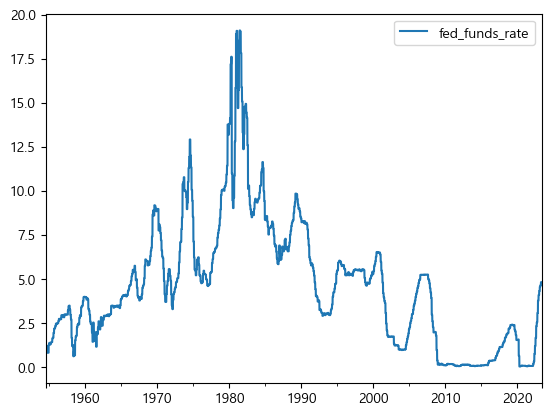

In [7]:
df_fred.plot()
plt.show()

In [8]:
df_fred_after_2000 = df_fred[df_fred.index >= '2000-01-01']
df_fred_after_2000.head()

,fed_funds_rate
2000-01-01,5.45
2000-01-02,5.45
2000-01-03,5.45
2000-01-04,5.45
2000-01-05,5.45


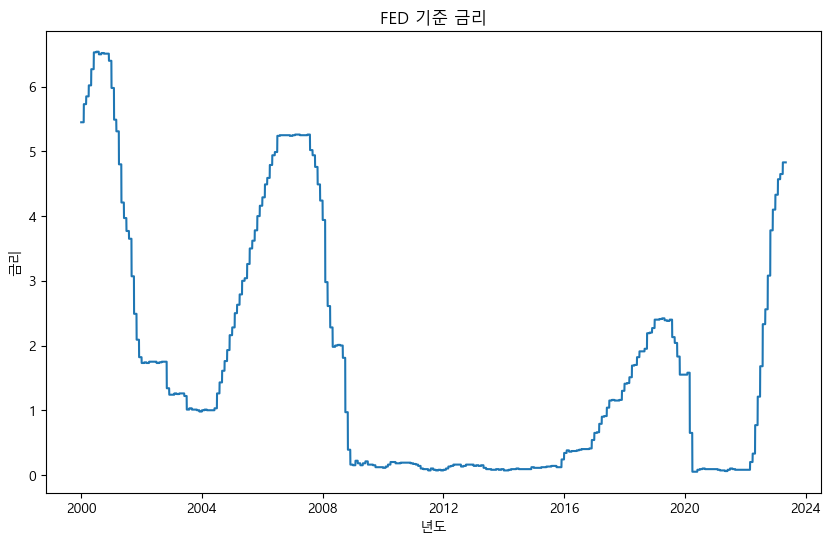

In [9]:
plt.figure(figsize=(10,6))
plt.plot(df_fred_after_2000.fed_funds_rate, label='FED 기준 금리')
plt.title('FED 기준 금리')
plt.xlabel('년도')
plt.ylabel('금리')
plt.show()

In [28]:
#df_fred_after_2019 = df_fred[df_fred.index >= '2019-01-01']

In [16]:
df_yfinance = get_yfinance_prices({'TLT': 'TLT'})

Getting TLT with symbol TLT
[*********************100%***********************]  1 of 1 completed
Error getting TLT


In [27]:
df_yfinance.dropna(inplace=True)
df_yfinance

,TLT
2002-07-30,40.822666
2002-07-31,41.328476
2002-08-01,41.563869
2002-08-02,41.989471
2002-08-03,41.989471
...,...
2023-05-03,106.290001
2023-05-04,105.239998
2023-05-05,104.889999
2023-05-06,104.889999


In [29]:
df_fred_from_tlt = df_fred[df_fred.index >= '2002-07-30']

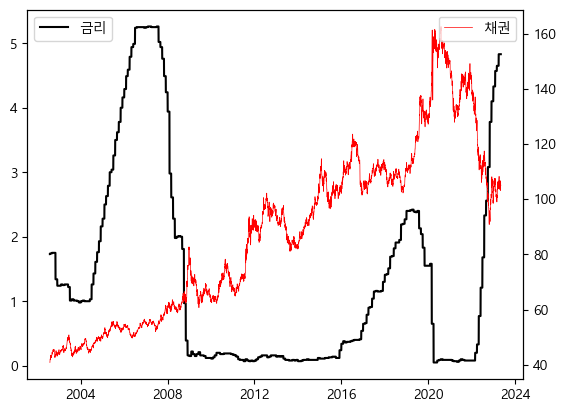

In [32]:
fig, ax = plt.subplots()
ax.plot(df_fred_from_tlt.index, df_fred_from_tlt.fed_funds_rate, label='금리',
       color='black')
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.plot(df_yfinance.index, 
         df_yfinance['TLT'], 
         label='채권',
         linestyle='-',
         linewidth=0.5,
         color='red')
ax2.legend(loc='upper right')
plt.show()

In [35]:
yfinance_assets = {'IEF':'IEF', 'TLT':'TLT', 'EDV':'EDV'}
df_yfinance = get_yfinance_prices(yfinance_assets)

Getting IEF with symbol IEF
[*********************100%***********************]  1 of 1 completed
Error getting IEF
Getting TLT with symbol TLT
[*********************100%***********************]  1 of 1 completed
Error getting TLT
Getting EDV with symbol EDV
[*********************100%***********************]  1 of 1 completed
Error getting EDV


In [36]:
df_yfinance

,IEF,TLT,EDV
1900-01-01,NaN,NaN,NaN
1900-01-02,NaN,NaN,NaN
1900-01-03,NaN,NaN,NaN
1900-01-04,NaN,NaN,NaN
1900-01-05,NaN,NaN,NaN
...,...,...,...
2023-05-03,100.250000,106.290001,89.879997
2023-05-04,100.230003,105.239998,88.620003
2023-05-05,99.690002,104.889999,88.220001
2023-05-06,99.690002,104.889999,88.220001


In [37]:
df_yfinance.dropna(inplace=True)

In [39]:
df_yfinance.head()


,IEF,TLT,EDV
2008-01-29,63.815845,61.653858,46.313488
2008-01-30,63.787354,61.251217,45.315334
2008-01-31,64.115303,61.686298,46.356079
2008-02-01,64.323441,62.057083,46.550049
2008-02-02,64.323441,62.057083,46.550049


In [40]:
df_yfinance.tail()

,IEF,TLT,EDV
2023-05-03,100.250000,106.290001,89.879997
2023-05-04,100.230003,105.239998,88.620003
2023-05-05,99.690002,104.889999,88.220001
2023-05-06,99.690002,104.889999,88.220001
2023-05-07,99.690002,104.889999,88.220001


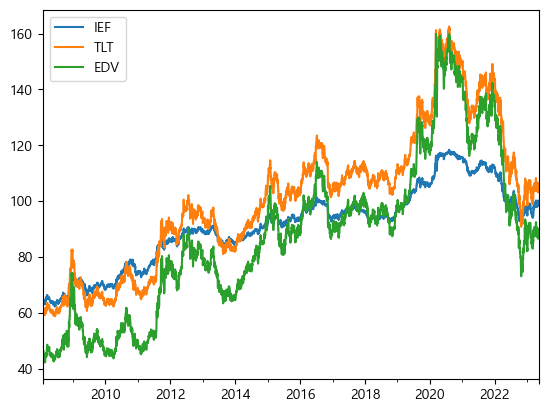

In [38]:
df_yfinance.plot()
plt.show()

In [46]:
df_yfinance['IEF 20MA'] = df_yfinance['IEF'].rolling(window=20).mean()
df_yfinance['TLT 20MA'] = df_yfinance['TLT'].rolling(window=20).mean()
df_yfinance['EDV 20MA'] = df_yfinance['EDV'].rolling(window=20).mean()

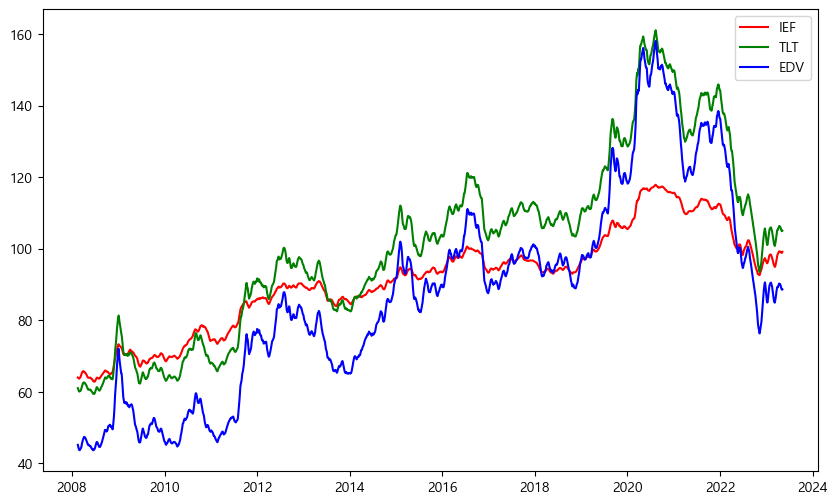

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(df_yfinance['IEF 20MA'], color = 'r', label='IEF')
plt.plot(df_yfinance['TLT 20MA'], color = 'g', label='TLT')
plt.plot(df_yfinance['EDV 20MA'], color = 'b', label='EDV')
plt.legend()
plt.show()

In [ ]:
df_fred_after_2010 = df_fred[df_fred.index >= '2010-01-01']

In [64]:
#(df_yfinance['IEF 20MA'].max() - df_yfinance['IEF 20MA'].min())/df_yfinance['IEF 20MA'].min() * 100
def calculate_total_return(keys):
    total_returns = []
    for key in keys:
        total_return = (df_yfinance[key].max() - df_yfinance[key].min())/df_yfinance[key].min() * 100
        total_returns.append(round(total_return))
    return total_returns

In [65]:
keys = ['IEF 20MA', 'TLT 20MA', 'EDV 20MA']

In [66]:
total_returns = calculate_total_return(keys)
total_returns

[88, 171, 262]

In [67]:
(3.6/1.0)**(1/13)-1

0.10355123229480934

In [ ]:
import numpy as np

In [75]:
np.corrcoef(df_fred_after_2010.fed_funds_rate, df_yfinance_after_2010['TLT_ETF'])

array([[1.        , 0.11652651],
       [0.11652651, 1.        ]])

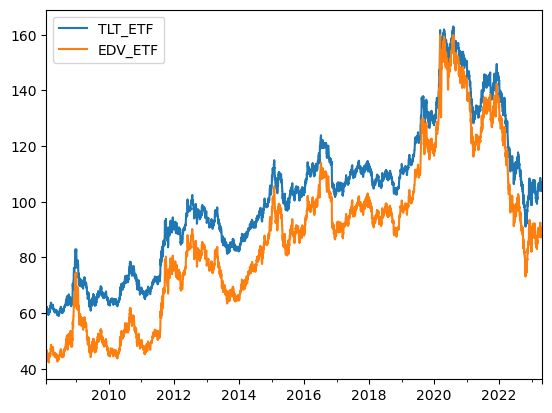

In [51]:
df_yfinance.plot()
plt.show()

In [52]:
df_yfinance.head(3)

,TLT_ETF,EDV_ETF
2008-01-29,61.809464,46.313511
2008-01-30,61.405830,45.315311
2008-01-31,61.842033,46.356068


In [53]:
df_yfinance_after_2010 = df_yfinance[df_yfinance.index >= '2010-1-1']
df_yfinance_after_2010

,TLT_ETF,EDV_ETF
2010-01-01,63.444786,45.867680
2010-01-02,63.444786,45.867680
2010-01-03,63.444786,45.867680
2010-01-04,63.388309,45.443138
2010-01-05,63.797695,45.861870
...,...,...
2023-04-27,104.769997,88.199997
2023-04-28,106.459999,90.010002
2023-04-29,106.459999,90.010002
2023-04-30,106.459999,90.010002


In [54]:
df_fred_after_2010 = df_fred[df_fred.index >= '2010-01-01']
df_fred_after_2010

,fed_funds_rate
2010-01-01,0.11
2010-01-02,0.11
2010-01-03,0.11
2010-01-04,0.11
2010-01-05,0.11
...,...
2023-04-27,4.65
2023-04-28,4.65
2023-04-29,4.65
2023-04-30,4.65


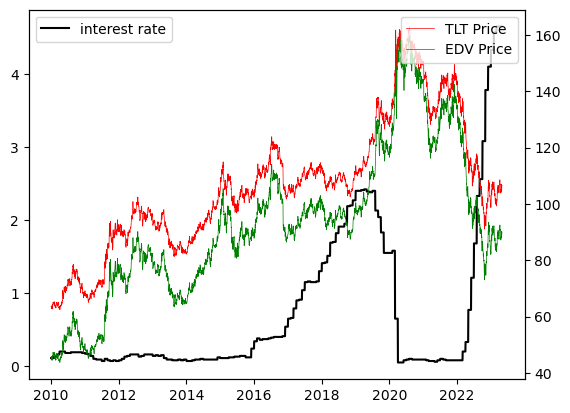

In [67]:
fig, ax = plt.subplots()
ax.plot(df_fred_after_2010.index, df_fred_after_2010.fed_funds_rate, label='interest rate',
       color='black')
ax.legend(loc=0)

ax2 = ax.twinx()
ax2.plot(df_yfinance_after_2010.index, 
         df_yfinance_after_2010['TLT_ETF'], 
         label='TLT Price',
         linestyle='-',
         linewidth=0.5,
         color='red')
ax2.plot(df_yfinance_after_2010.index, 
         df_yfinance_after_2010['EDV_ETF'], 
         label='EDV Price',
         linestyle='-',
         linewidth=0.5,
         color='green')
ax2.legend(loc='upper right')
plt.show()

참고

https://jeremywhittaker.com/index.php/2022/01/27/retrieving-historical-data-from-fred-or-yahoo-finance-using-python/

In [12]:
def get_asset_prices(filename):
  df_fred = get_fred_prices(fred_assets)
  df_yfinance = get_yfinance_prices(yfinance_assets)
  df = pd.concat([df_fred, df_yfinance], axis=1)
  return(df)




In [ ]:
df = get_asset_prices('asset_prices')
df.dropna(how='all', inplace=True)
save_df(df, 'asset_prices')
df = pd.read_pickle("asset_prices.pkl")
plot_and_save(df,'asset_prices')


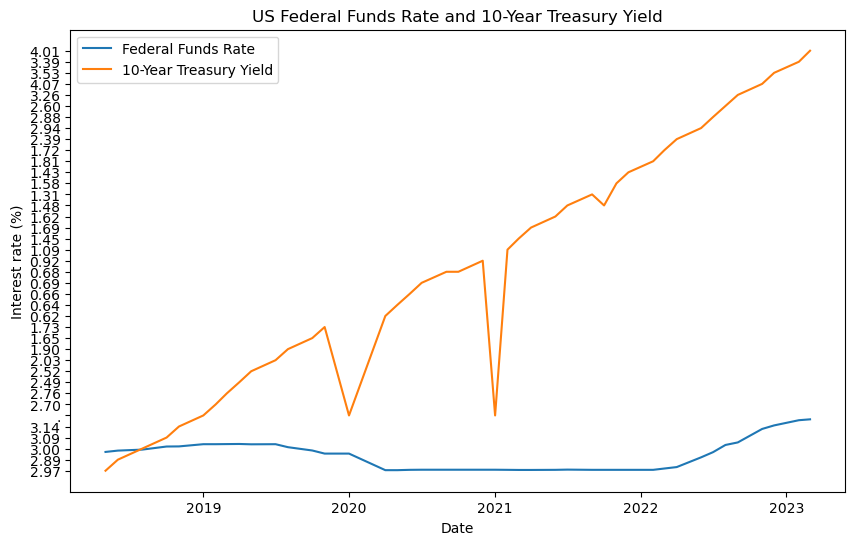

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# FRED API에서 데이터 가져오기
# https://fred.stlouisfed.org/
df_ffr = pd.read_csv('FEDFUNDS.csv', index_col='DATE', parse_dates=True)
df_tsy = pd.read_csv('DGS10.csv', index_col='DATE', parse_dates=True)

# 두 데이터프레임을 합쳐 하나의 데이터프레임으로 만들기
df = pd.merge(df_ffr, df_tsy, how='inner', left_index=True, right_index=True)
df.columns = ['ffr', 'tsy']

# 기준 금리와 장기 국채 수익률 시각화
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df.index, df.ffr, label='Federal Funds Rate')
ax.plot(df.index, df.tsy, label='10-Year Treasury Yield')
ax.set_xlabel('Date')
ax.set_ylabel('Interest rate (%)')
ax.set_title('US Federal Funds Rate and 10-Year Treasury Yield')
ax.legend()
plt.show()


In [4]:
def get_average(*data):
    avg = sum(data)/len(data)    
    return avg

result = get_average(3, 6)
print(result)

4.5


In [3]:
import pandas as pd
df = pd.DataFrame(data = [
        ['버거킹', '맥도날드', '롯데리아'],
        [ 5000,  4500,  4000],
        [5.0, 4.5, 4.3]])

df.columns = ['food',  'price',   'rating']
df

,food,price,rating
0,버거킹,맥도날드,롯데리아
1,5000,4500,4000
2,5.0,4.5,4.3


In [76]:
%jupyter nbconvert --to script bond_interest_rate_analyzer-Copy1.ipynb

UsageError: Line magic function `%jupyter` not found.
